In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bertopic import BERTopic
import json

/Users/ihp/opt/miniconda3/envs/tfnew/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ihp/opt/miniconda3/envs/tfnew/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/ihp/opt/miniconda3/envs/tfnew/lib/python3.9/site-packages/uma

In [2]:
RESULTS_DIR = "findings"

In [3]:
stop_words = None
with open("stopwords.txt", "r") as stop_file:
    stop_words = set(stop_file.read().splitlines())

Start Lemmatized Tweets Processing

In [5]:
tweets = []
classes = []
candidates = []
lemm_tweets = None

with open("data/lemm_tweets.json", "r") as in_file:
    lemm_tweets = json.load(in_file)

for candidate, candidate_tweets in lemm_tweets.items():
    candidates.append(candidate)
    for tweet in candidate_tweets:
        non_stop_words = []

        for word in tweet.split():
            if word not in stop_words:
                non_stop_words.append(word)

        if len(non_stop_words) > 0:
            tweets.append(" ".join(non_stop_words))
            classes.append(candidate)

In [9]:
def convert_filename(name):
    name = name.replace("İ", "I")
    name = name.replace("ı", "i")
    name = name.replace("ç", "c")
    name = name.replace("Ç", "C")
    name = name.replace("ğ", "g")
    name = name.replace("Ğ", "G")
    name = name.replace("ö", "o")
    name = name.replace("Ö", "O")
    name = name.replace("ü", "u")
    name = name.replace("Ü", "U")
    name = name.replace("ş", "s")
    name = name.replace("Ş", "S")
    name = name.replace(" ", "_")
    return name

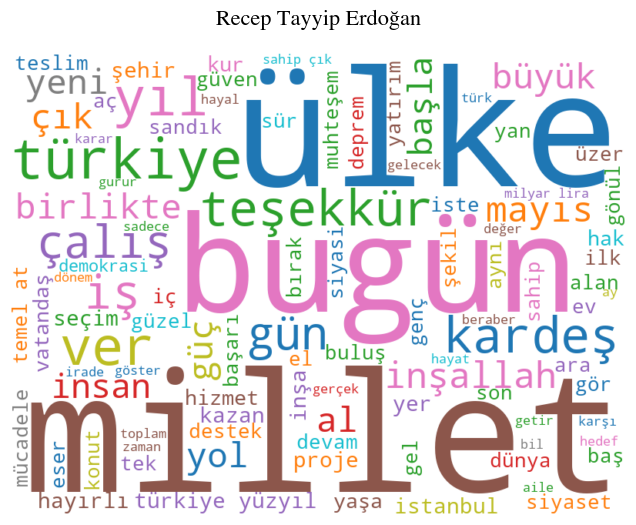

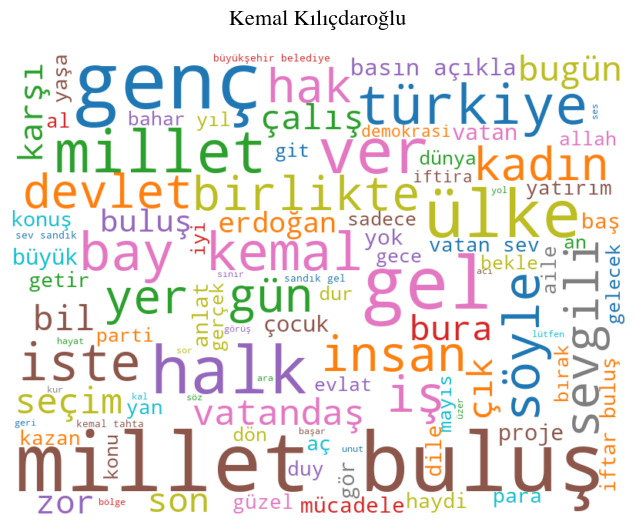

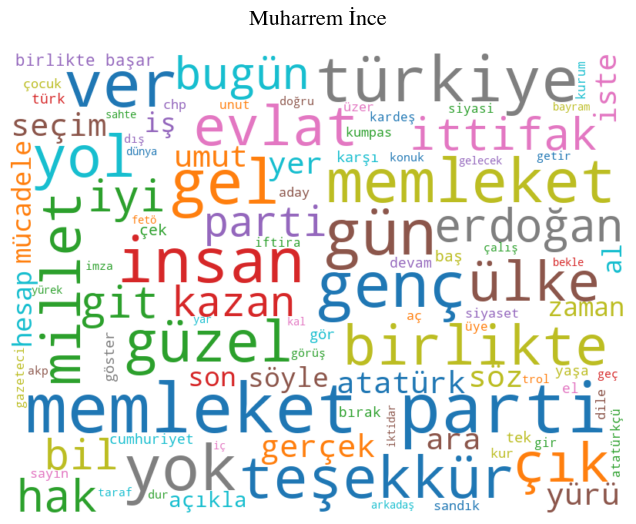

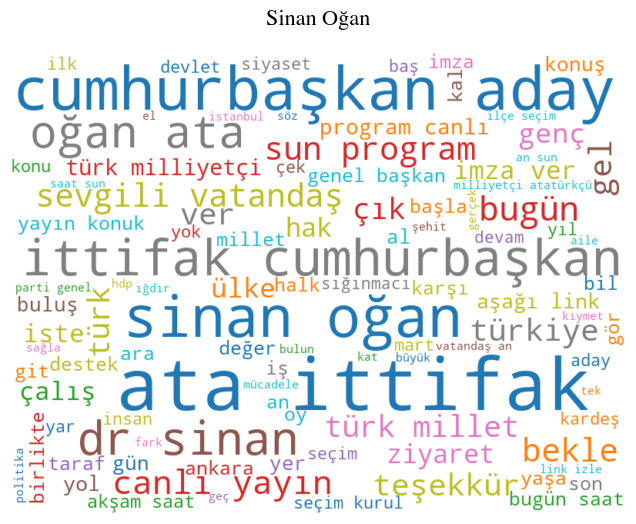

In [10]:
title_font = {"family": "Times", "size": 16}

for cand, cand_tweets in lemm_tweets.items():
    wc = WordCloud(max_words=100, random_state=42, width=800, height=600,
                   stopwords=stop_words, background_color="white", colormap="tab10", min_font_size=6)
    wc.generate(" ".join(cand_tweets))

    plt.figure(figsize=(8, 6))
    plt.title(cand, fontdict=title_font, pad=20)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    file_name = convert_filename(cand).lower()
    wc_svg = wc.to_svg(embed_font=True)
    with open(f"{RESULTS_DIR}/wc_{file_name}.svg", "w") as out_file:
        out_file.write(wc_svg)

    plt.show()

In [12]:
topic_model = BERTopic(language="multilingual", verbose=True)
topics, probs = topic_model.fit_transform(tweets)

Batches:   0%|          | 0/68 [00:00<?, ?it/s]

2023-06-07 12:43:54,130 - BERTopic - Transformed documents to Embeddings
2023-06-07 12:43:57,812 - BERTopic - Reduced dimensionality
2023-06-07 12:43:57,848 - BERTopic - Clustered reduced embeddings


In [13]:
topic_model.reduce_topics(tweets, nr_topics=24)

topic_labels_lemm = topic_model.generate_topic_labels(
    nr_words=5, topic_prefix=False, separator=", ")

topic_model.set_topic_labels(topic_labels_lemm)
df = topic_model.get_topic_info()
df.to_excel(f"{RESULTS_DIR}/topics.xlsx", index=False)
df.head(25)

2023-06-07 12:46:00,190 - BERTopic - Reduced number of topics from 36 to 24


,Topic,Count,Name,CustomName
0,-1,628,-1_türkiye_millet_ülke_türk,"türkiye, millet, ülke, türk, ver"
1,0,284,0_buluş_millet_oy_sandık,"buluş, millet, oy, sandık, seçim"
2,1,227,1_cumhurbaşkan_aday_ata_ittifak,"cumhurbaşkan, aday, ata, ittifak, dr"
3,2,180,2_yayın_program_canlı_konuk,"yayın, program, canlı, konuk, sun"
4,3,132,3_konut_deprem_depremzede_temel,"konut, deprem, depremzede, temel, hastane"
5,4,111,4_türk_türkiye_milliyetçi_yüzyıl,"türk, türkiye, milliyetçi, yüzyıl, millet"
6,5,105,5_şehit_rahmet_atatürk_gazi,"şehit, rahmet, atatürk, gazi, allah"
7,6,63,6_teşekkür_başkan_muhteşem_dernek,"teşekkür, başkan, muhteşem, dernek, misafirper..."
8,7,62,7_gel_saat_bekle_bura,"gel, saat, bekle, bura, bugün"
9,8,51,8_esnaf_cadde_ziyaret_yoğun,"esnaf, cadde, ziyaret, yoğun, genç"


In [14]:
fig = topic_model.visualize_barchart(top_n_topics=12, n_words=8, width=300)
fig.write_image(f"{RESULTS_DIR}/topic_word_scores.pdf")
fig.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [15]:
topics_per_class = topic_model.topics_per_class(tweets, classes=classes)
fig = topic_model.visualize_topics_per_class(
    topics_per_class, top_n_topics=12, width=1000, custom_labels=True)
fig.write_html(f"{RESULTS_DIR}/topics_per_class.html")
fig.show()

4it [00:00, 64.53it/s]


In [16]:
for candidate in candidates:
    df = topics_per_class.query('Class == "' + candidate + '" and Topic > -1').sort_values(
        by=["Frequency"], ascending=False).loc[:, "Words":"Name"].drop("Class", axis=1).head(12)
    
    file_name = convert_filename(candidate).lower()
    df.to_excel(f"{RESULTS_DIR}/{file_name}.xlsx", index=False)

    print(candidate)
    print(df.to_string(index=False))
    print("\n\n")

Recep Tayyip Erdoğan
                                        Words  Frequency                                                     Name
            konut, deprem, temel, hastane, at        100                konut, deprem, depremzede, temel, hastane
             millet, buluş, oy, sandık, seçim         82                         buluş, millet, oy, sandık, seçim
        şehit, rahmet, camii, atatürk, emanet         36                      şehit, rahmet, atatürk, gazi, allah
           milyar, yatırım, lira, kamu, dolar         31                       milyar, yatırım, lira, dolar, kamu
  muhteşem, bil, şanlıurfa, adana, geleneksel         27                     muhteşem, bil, şanlıurfa, van, adana
 türkiye, yüzyıl, türk, milliyetçilik, millet         27                türk, türkiye, milliyetçi, yüzyıl, millet
teşekkür, muhteşem, istanbul, kardeş, ramazan         26 teşekkür, başkan, muhteşem, dernek, misafirperverlikleri
       nükleer, santral, enerji, üretim, ülke         24           

In [ ]:
"""
topic_model.visualize_documents(
    tweets, height=600, custom_labels=True, topics=list(range(12)))
"""

Start Stemmed Tweets Processing

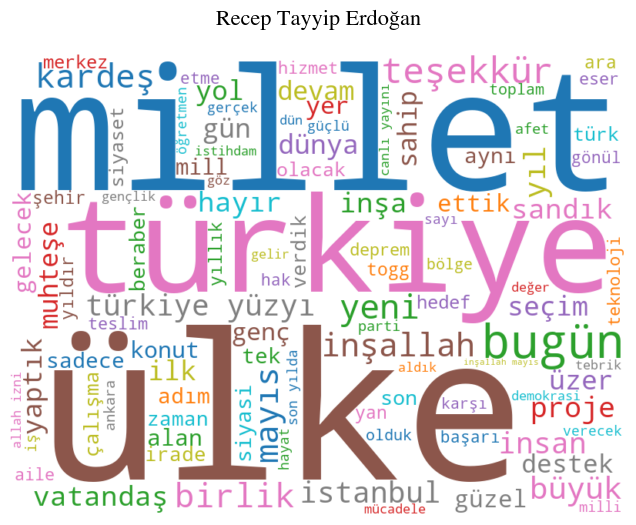

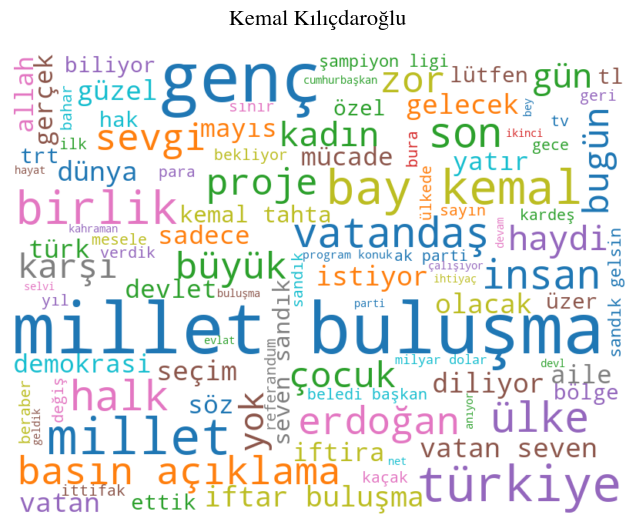

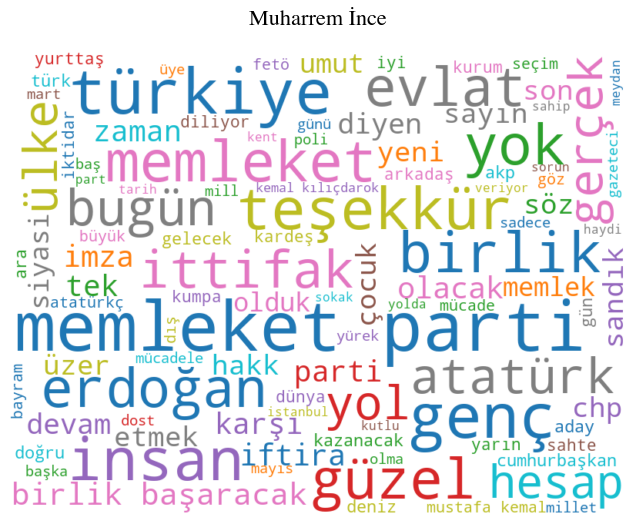

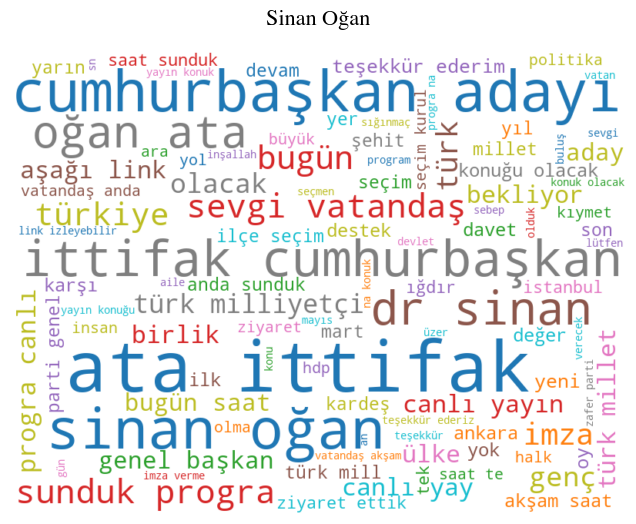

In [18]:
stem_tweets = None
st_tweets = []

with open("data/stem_tweets.json", "r") as in_file:
    stem_tweets = json.load(in_file)

title_font = {"family": "Times", "size": 16}

for cand, cand_tweets in stem_tweets.items():
    wc = WordCloud(max_words=100, random_state=42, width=800, height=600,
                   stopwords=stop_words, background_color="white", colormap="tab10", min_font_size=6)
    wc.generate(" ".join(cand_tweets))

    plt.figure(figsize=(8, 6))
    plt.title(cand, fontdict=title_font, pad=20)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    file_name = convert_filename(cand).lower()
    wc_svg = wc.to_svg(embed_font=True)
    with open(f"{RESULTS_DIR}/wc_{file_name}_stem.svg", "w") as out_file:
        out_file.write(wc_svg)

    plt.show()

In [ ]:
bert_stem = BERTopic(language="multilingual")
topics, probs = bert_stem.fit_transform(st_tweets)
bert_stem.get_topic_info()